In [ ]:
#Bunyodbek Ibrokhimov, ID: 22202358
#Medical AI assignment for Chapter 4 - 5

#Chapters 4 and 5 are highly related to each other. Therefore, i decided to submit them together.

## Model overfitting and underfitting

Those are very common issues in deep learning and depending on the application and the source of the problem, solutions may differ.

### Please note that in some code segments, I am using codes from my own mini projects to explain the chapter topics. Thus, they are not the same codes used in the book. Some codes are taken directly from the book with some changes.

In [2]:
from tensorflow.keras.datasets import mnist
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 784))
train_images = train_images.astype("float32") / 255
train_images_with_noise_channels = np.concatenate([train_images, np.random.random((len(train_images), 784))], axis=1)
train_images_with_zeros_channels = np.concatenate([train_images, np.zeros((len(train_images), 784))], axis=1)

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model
model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)
model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 5s 5ms/step - loss: 0.6212 - accuracy: 0.8099 - val_loss: 0.2647 - val_accuracy: 0.9203
Epoch 2/10
375/375 [==============================] - 1s 4ms/step - loss: 0.2533 - accuracy: 0.9206 - val_loss: 0.1851 - val_accuracy: 0.9459
Epoch 3/10
375/375 [==============================] - 2s 4ms/step - loss: 0.1628 - accuracy: 0.9490 - val_loss: 0.1480 - val_accuracy: 0.9550
Epoch 4/10
375/375 [==============================] - 1s 4ms/step - loss: 0.1143 - accuracy: 0.9641 - val_loss: 0.1437 - val_accuracy: 0.9568
Epoch 5/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0834 - accuracy: 0.9736 - val_loss: 0.1369 - val_accuracy: 0.9597
Epoch 6/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0630 - accuracy: 0.9796 - val_loss: 0.1188 - val_accuracy: 0.9655
Epoch 7/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0455 - accuracy: 0.9854 - val_loss: 0.1640 - val_accuracy: 0.9562
Epoch 

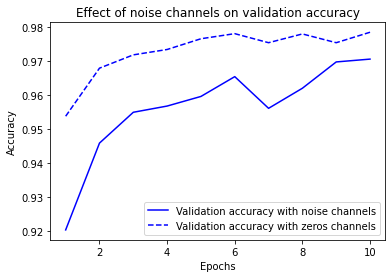

In [3]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()


Lets compare the performance of MNIST dataset on two different network sizes:


In [5]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

num_classes = 10
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = keras.Sequential(
    [
        keras.Input(shape=(28, 28, 1)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)
batch_size = 64
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=10, validation_split=0.1)

score = model.evaluate(x_test, y_test, verbose=0)
print("Test accuracy:", score[1])


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Epoch 1/10
844/844 [==============================] - 5s 5ms/step - loss: 0.2829 - accuracy: 0.9141 - val_loss: 0.0705 - val_accuracy: 0.9807
Epoch 2/10
844/844 [==============================] - 4s 5ms/step - loss: 0.0976 - accuracy: 0.9703 - val_loss: 0.0494 - val_accuracy: 0.9872
Epoch 3/10
844/844 [==============================] - 4s 5ms/step - loss: 0.0763 - accuracy: 0.9767 - val_loss: 0.0448 - val_accuracy: 0.9880
Epoch 4/10
844/844 [==============================] - 4s 5ms/step - loss: 0.0651 - accuracy: 0.9798 - val_loss: 0.0389 - val_accuracy: 0.9905
Epoch 5/10
844/844 [==============================] - 4s 5ms/step - loss: 0.0565 - accuracy: 0.9825 - val_loss: 0.0346 - val_accuracy: 0.9893
Epoch 6/10
844/844 [==============================] - 4s 5ms/step - loss: 0.0517 - accuracy: 0.9836 - val_loss: 0.0341 - val_accuracy: 0.9900
Epoch 7/10
844/844 [==============================] - 4s 5ms/step - loss: 0

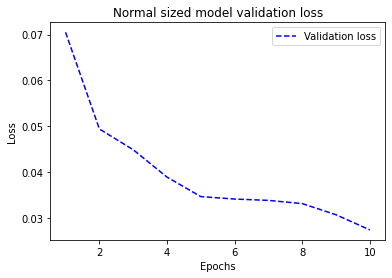

In [6]:
val_loss = history.history["val_loss"]
epochs = range(1, 11)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Normal sized model validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

Epoch 1/10
844/844 [==============================] - 4s 5ms/step - loss: 0.5847 - accuracy: 0.8149 - val_loss: 0.1396 - val_accuracy: 0.9642
Epoch 2/10
844/844 [==============================] - 4s 5ms/step - loss: 0.2549 - accuracy: 0.9221 - val_loss: 0.0956 - val_accuracy: 0.9730
Epoch 3/10
844/844 [==============================] - 4s 5ms/step - loss: 0.2079 - accuracy: 0.9369 - val_loss: 0.0835 - val_accuracy: 0.9772
Epoch 4/10
844/844 [==============================] - 4s 5ms/step - loss: 0.1885 - accuracy: 0.9420 - val_loss: 0.0718 - val_accuracy: 0.9807
Epoch 5/10
844/844 [==============================] - 4s 5ms/step - loss: 0.1698 - accuracy: 0.9480 - val_loss: 0.0648 - val_accuracy: 0.9833
Epoch 6/10
844/844 [==============================] - 4s 5ms/step - loss: 0.1626 - accuracy: 0.9501 - val_loss: 0.0616 - val_accuracy: 0.9825
Epoch 7/10
844/844 [==============================] - 4s 5ms/step - loss: 0.1498 - accuracy: 0.9543 - val_loss: 0.0614 - val_accuracy: 0.9818
Epoch 

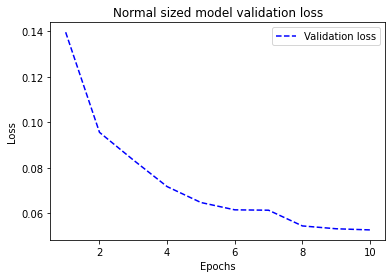

In [7]:
model = keras.Sequential(
    [
        keras.Input(shape=(28, 28, 1)),
        layers.Conv2D(8, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(16, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.6),
        layers.Dense(num_classes, activation="softmax"),
    ]
)
batch_size = 64
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history_small = model.fit(x_train, y_train, batch_size=batch_size, epochs=10, validation_split=0.1)

score = model.evaluate(x_test, y_test, verbose=0)
print("Test accuracy:", score[1])

val_loss = history_small.history["val_loss"]
epochs = range(1, 11)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Normal sized model validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()


As seen in the performance gap (1% accuracy drop is considered huge gap for MNIST dataset), the latter network doesn't have enough resources to learn the inputs. And it is very common issue. When we are facing lower accuracy (than expected), it is because either we chose wrong netwrok structure or our network is not large/deep enough to learn complex input features.


Epoch 1/10
704/704 [==============================] - 5s 6ms/step - loss: 0.1930 - accuracy: 0.9419 - val_loss: 0.0799 - val_accuracy: 0.9761
Epoch 2/10
704/704 [==============================] - 4s 6ms/step - loss: 0.0538 - accuracy: 0.9835 - val_loss: 0.0659 - val_accuracy: 0.9801
Epoch 3/10
704/704 [==============================] - 4s 6ms/step - loss: 0.0366 - accuracy: 0.9889 - val_loss: 0.0466 - val_accuracy: 0.9863
Epoch 4/10
704/704 [==============================] - 4s 6ms/step - loss: 0.0274 - accuracy: 0.9912 - val_loss: 0.0394 - val_accuracy: 0.9892
Epoch 5/10
704/704 [==============================] - 4s 6ms/step - loss: 0.0224 - accuracy: 0.9929 - val_loss: 0.0402 - val_accuracy: 0.9870
Epoch 6/10
704/704 [==============================] - 4s 6ms/step - loss: 0.0180 - accuracy: 0.9944 - val_loss: 0.0500 - val_accuracy: 0.9862
Epoch 7/10
704/704 [==============================] - 4s 6ms/step - loss: 0.0149 - accuracy: 0.9948 - val_loss: 0.0403 - val_accuracy: 0.9884
Epoch 

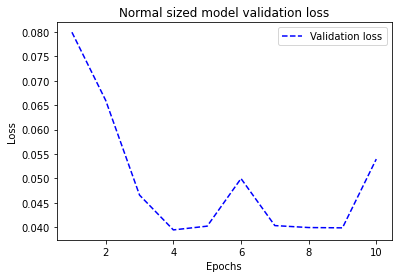

In [10]:
model = keras.Sequential(
    [
        keras.Input(shape=(28, 28, 1)),
        layers.Conv2D(32, kernel_size=(5, 5), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(5, 5), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(100, activation="relu"),
        layers.Dense(50, activation="relu"),
        layers.Dense(num_classes, activation="softmax"),
    ]
)
batch_size = 64
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history_large = model.fit(x_train, y_train, batch_size=batch_size, epochs=10, validation_split=0.25)

score = model.evaluate(x_test, y_test, verbose=0)
print("Test accuracy:", score[1])

val_loss = history_large.history["val_loss"]
epochs = range(1, 11)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Normal sized model validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [11]:
print(model.summary())

#larger network structure

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 100)               102500    
_________________________________________________________________
dense_12 (Dense)             (None, 50)               

In [12]:
model = keras.Sequential(
    [
        keras.Input(shape=(28, 28, 1)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
print(model.summary())

#our baseline model structure


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 1600)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 10)               


As we have witnessed, having 4.5x larger network size does not guarantee better performance. On the contrary, it hurts the network performance. Therefore, the network size should be carefully designed for each application or/and dataset.

When our network overfits to the training data, we may get low accuracy on test data. In these, situations, we might have to use regularizations or dropout layers.


Epoch 1/10
704/704 [==============================] - 5s 6ms/step - loss: 0.4630 - accuracy: 0.8537 - val_loss: 0.0766 - val_accuracy: 0.9783
Epoch 2/10
704/704 [==============================] - 4s 6ms/step - loss: 0.1460 - accuracy: 0.9589 - val_loss: 0.0621 - val_accuracy: 0.9819
Epoch 3/10
704/704 [==============================] - 4s 6ms/step - loss: 0.1085 - accuracy: 0.9698 - val_loss: 0.0446 - val_accuracy: 0.9872
Epoch 4/10
704/704 [==============================] - 4s 6ms/step - loss: 0.0884 - accuracy: 0.9761 - val_loss: 0.0402 - val_accuracy: 0.9892
Epoch 5/10
704/704 [==============================] - 4s 6ms/step - loss: 0.0816 - accuracy: 0.9776 - val_loss: 0.0382 - val_accuracy: 0.9895
Epoch 6/10
704/704 [==============================] - 5s 7ms/step - loss: 0.0704 - accuracy: 0.9800 - val_loss: 0.0375 - val_accuracy: 0.9897
Epoch 7/10
704/704 [==============================] - 5s 7ms/step - loss: 0.0655 - accuracy: 0.9829 - val_loss: 0.0371 - val_accuracy: 0.9896
Epoch 

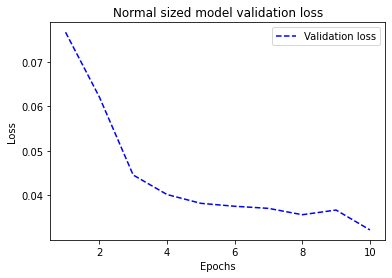

In [13]:
model = keras.Sequential(
    [
        keras.Input(shape=(28, 28, 1)),
        layers.Conv2D(32, kernel_size=(5, 5), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(5, 5), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(100, activation="relu"),
        layers.Dropout(0.5),
        layers.Dense(50, activation="relu"),
        layers.Dropout(0.2),
        layers.Dense(num_classes, activation="softmax"),
    ]
)
batch_size = 64
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history_large = model.fit(x_train, y_train, batch_size=batch_size, epochs=10, validation_split=0.25)

score = model.evaluate(x_test, y_test, verbose=0)
print("Test accuracy:", score[1])

val_loss = history_large.history["val_loss"]
epochs = range(1, 11)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Normal sized model validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

### Huge improvement

Under the same training settings and using the same network size, we could increase the performance from 98.9% to 99.3%. This is considered great improvement, a.k.a."statistical power", because MNIST dataset is one of hig-accuracy driven datasets, which means even 0.1 improvement is considered good achievement. 

This simple shows the importance of dropout layers and how we control the participation of neurons in the network and their impact on model performance.


### summary
However, there are a lot to know and learn to decide which network works best for the particular problem. Having the right sized network and including droupout or regularization does not guarantee the best performance. They are merely factors among other dozens of design choices, including but not limited to 
 -loss function, 
 -activation function, 
 -the number of layers in the network, 
 -the number of neurons in the layer, 
 -epochs
 -learning rate
 -preprocessing on the input
 -optimization
 And, good feeling and understanding of solving unknown or unseen problems comes with years of experience in the field. Then, we can mitigate most of trial-and-error stages in the process.


### I would like to show some interesting stuff about conv filters.


Most people use conv nets without realizing their significance in the deep learning era. In order to assess the performance, not only we should learn output to input relationship but also need to learn further layers' output.

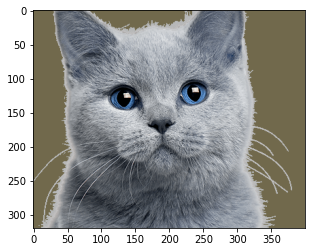

In [15]:
from keras.layers import Convolution2D, MaxPooling2D, Activation
from keras.models import Sequential

import numpy as np
import matplotlib.pyplot as plt
import cv2

cat = cv2.imread('cat.png')
plt.imshow(cat)
plt.show()

  


Lets see how conv nets actually learn and "see" the unique features of the cat.


(318, 398, 1)
(318, 398)


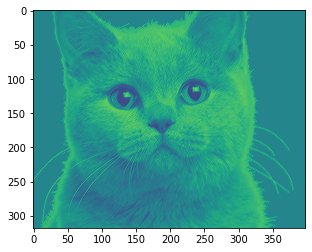

In [16]:
def output_cat(model2, cat):
    '''prints the cat as a 2d array'''
    cat_batch = np.expand_dims(cat,axis=0)
    conv_cat2 = model2.predict(cat_batch)

    conv_cat2 = np.squeeze(conv_cat2, axis=0)
    print(conv_cat2.shape)
    conv_cat2 = conv_cat2.reshape((conv_cat2.shape[:2]))

    print(conv_cat2.shape)
    plt.imshow(conv_cat2)
    plt.show()

model2 = Sequential()
model2.add(Convolution2D(1,(3,3),input_shape=cat.shape))

output_cat(model2, cat)  

(311, 391, 1)
(311, 391)


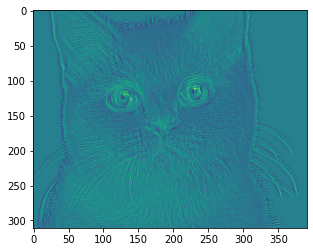

In [20]:

model2 = Sequential()
model2.add(Convolution2D(1,(10,10),input_shape=cat.shape))


output_cat(model2, cat)  

(318, 398, 1)
(318, 398)


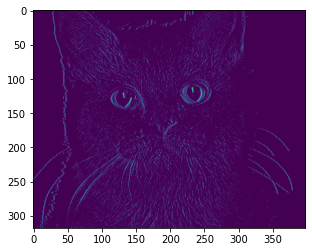

In [22]:
#add activation layer

model2 = Sequential()
model2.add(Convolution2D(1,(3,3),input_shape=cat.shape))
model2.add(Activation('relu'))

output_cat(model2, cat) 

(159, 199, 1)
(159, 199)


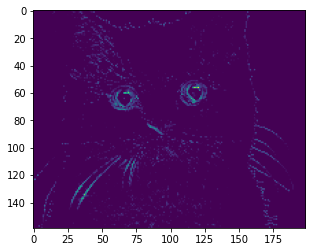

In [23]:
#add max pooling

model2 = Sequential()
model2.add(Convolution2D(1,(3,3),input_shape=cat.shape))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))


output_cat(model2, cat) 

(76, 96, 1)
(76, 96)


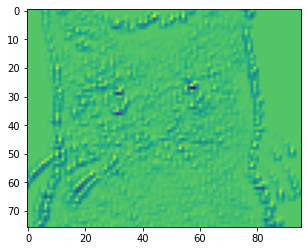

In [35]:

model2 = Sequential()
model2.add(Convolution2D(1,(3,3),input_shape=cat.shape))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Convolution2D(1,(3,3),input_shape=cat.shape))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Convolution2D(1,(3,3),input_shape=cat.shape))


output_cat(model2, cat)  

(76, 96, 1)
(76, 96)


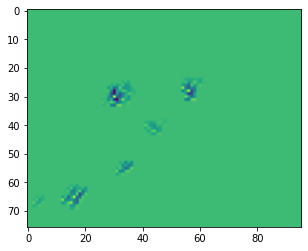

In [40]:
model2 = Sequential()
model2.add(Convolution2D(1,(3,3),input_shape=cat.shape))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Convolution2D(1,(3,3),input_shape=cat.shape))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Convolution2D(1,(3,3),input_shape=cat.shape))


output_cat(model2, cat)

(76, 96, 1)
(76, 96)


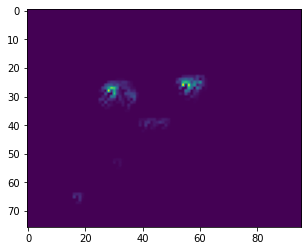

In [41]:
model2 = Sequential()
model2.add(Convolution2D(1,(3,3),input_shape=cat.shape))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Convolution2D(1,(3,3),input_shape=cat.shape))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Convolution2D(1,(3,3),input_shape=cat.shape))
model2.add(Activation('relu'))


output_cat(model2, cat)

(76, 96, 1)
(76, 96)


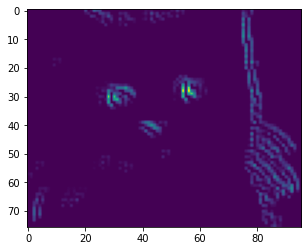

In [60]:
model2 = Sequential()
model2.add(Convolution2D(1,(3,3),input_shape=cat.shape))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Convolution2D(1,(3,3),input_shape=cat.shape))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Convolution2D(1,(3,3),input_shape=cat.shape))
model2.add(Activation('relu'))


output_cat(model2, cat)


As we can see above. different filters can see different informations, such as eyes, nose, whiskers, ears. These are distinct features of the cat and may be used in a model to differentiate cats from, for example, birds or dogs.

## now, lets go deeper into convolutional neural networks.

*Note. The beginning of chapter 5 is about using conv nets. Since, i have already been using conv layers, i skipped that part.

Instead of using cat-vs-dog dataset (too easy to get high accuracy), I decided to show how to implement deep learning techniques on far more complex dataset. For this, I will show mini project on face emotion recognition (FER) data.
This is very complicated task and usually the accuracy of 66-67% is considered really good performance.

Please check https://www.kaggle.com/c/challenges-in-representation-learning-facial-expression-recognition-challenge/overview
for more details on the FER challenge

In [61]:
import pandas as pd
import numpy as np
import time as t
import cv2 as cv
import glob
import collections
from matplotlib import pyplot as plt
from keras.models import Sequential, load_model
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.optimizers import Adam, SGD
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.metrics.classification import accuracy_score
np.set_printoptions(threshold=np.inf)

e:\anaconda3\envs\tf\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [62]:
#read FER dataset
data = pd.read_csv('fer2013.csv')
print(data.values.shape)

(35887, 3)


In [63]:
x=data['pixels']
y=data['emotion']
X = np.array(list(map(str.split, x)), np.float32)

In [64]:
#data splitting
x_train = X[:28709]
y_train = y[:28709]
x_test = X[28709:]
y_test = y[28709:]
y_class = y_test
x_train = x_train.reshape(x_train.shape[0], 48, 48, 1)
x_test = x_test.reshape(x_test.shape[0], 48, 48, 1)
input_shape = (48, 48, 1)
x_train /= 255
x_test /= 255

In [65]:
#validation data
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.15, random_state=101)
y_train = np_utils.to_categorical(y_train, 7)
y_val = np_utils.to_categorical(y_val, 7)
y_test = np_utils.to_categorical(y_test, 7)
print('x_train', x_train.shape)
print('y_train', y_train.shape)
print('x_val' ,x_val.shape)
print('y_val', y_val.shape)
print('x_test', x_test.shape)
print('y_test', y_test.shape)

x_train (24402, 48, 48, 1)
y_train (24402, 7)
x_val (4307, 48, 48, 1)
y_val (4307, 7)
x_test (7178, 48, 48, 1)
y_test (7178, 7)


In [66]:
#data generator
datagen = ImageDataGenerator( 
            rotation_range = 10,
            horizontal_flip = True,
            width_shift_range=0.1,
            height_shift_range=0.1,
            fill_mode = 'nearest')  
#testgen = ImageDataGenerator(rescale=1./255)
datagen.fit(x_train)

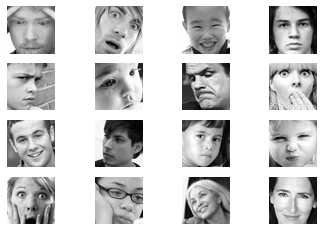

In [67]:
#checking generated images

for ix in range(1,17):
    plt.axis('off')
    plt.subplot(4,4,ix)
    plt.imshow(x_train[ix].reshape((48, 48)), interpolation='none', cmap='gray')
plt.axis('off')
plt.show()

In [72]:
#building a CNN model
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=input_shape, padding="same", activation='relu', name='b_conv1'))
model.add(Conv2D(64, (3, 3), padding="same", activation='relu', name='b_conv2'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', padding="same", name='b_conv3'))
model.add(Conv2D(128, (3, 3), padding="same", activation='relu', name='b_conv4'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(256, (3, 3), activation='relu', padding="same", name='b_conv5'))
model.add(Conv2D(256, (3, 3), padding="same", activation='relu', name='b_conv6'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(512, (3, 3), activation='relu', padding="same", name='b_conv7'))
model.add(Conv2D(512, (3, 3), padding="same", activation='relu', name='b_conv8'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu', name='b_dense1'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

In [78]:
#compiling the model
opt = SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [79]:
#preparing hyperparameters for training
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.5, min_delta=0.0001, patience=10, verbose=1)
batch_size = 128



print("\n\n---------starting training\n\n")
history = model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size), 
                                steps_per_epoch = len(x_train) // batch_size, callbacks = [lr_reduce], 
                                validation_data = (x_val, y_val), 
                                epochs = 25, verbose = 1)
print("\n\n---------end of training\n\n")
model.save('fer2013_vgg_b.h5')
#testing the model
loss = model.evaluate(x_test, y_test, batch_size=batch_size, verbose=2)
print('Accuracy: ', loss[1], '\n')



---------starting training


Epoch 1/25
190/190 [==============================] - 11s 56ms/step - loss: 1.7753 - accuracy: 0.2675 - val_loss: 1.7344 - val_accuracy: 0.2898
Epoch 2/25
190/190 [==============================] - 10s 53ms/step - loss: 1.7676 - accuracy: 0.2698 - val_loss: 1.7290 - val_accuracy: 0.2837
Epoch 3/25
190/190 [==============================] - 10s 53ms/step - loss: 1.7610 - accuracy: 0.2742 - val_loss: 1.7123 - val_accuracy: 0.2925
Epoch 4/25
190/190 [==============================] - 10s 54ms/step - loss: 1.7494 - accuracy: 0.2846 - val_loss: 1.7152 - val_accuracy: 0.2965
Epoch 5/25
190/190 [==============================] - 10s 54ms/step - loss: 1.7386 - accuracy: 0.2941 - val_loss: 1.6643 - val_accuracy: 0.3325
Epoch 6/25
190/190 [==============================] - 10s 55ms/step - loss: 1.7218 - accuracy: 0.3039 - val_loss: 1.7360 - val_accuracy: 0.3095
Epoch 7/25
190/190 [==============================] - 10s 54ms/step - loss: 1.7021 - accuracy: 0.3182 - v

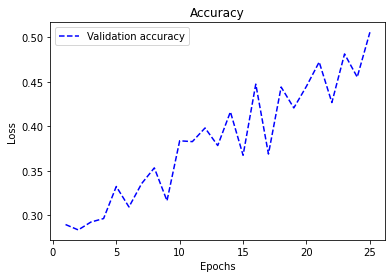

In [81]:

val_loss = history.history["val_accuracy"]
epochs = range(1, 26)
plt.plot(epochs, val_loss, "b--",
         label="Validation accuracy")
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()



Overall trend of the plot is always increasing. We need to train about 250 epochs to get over 67% accuracy.


In [82]:
model = load_model('fer2013_vgg_b.h5')
history = model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size), 
                                steps_per_epoch = len(x_train) // batch_size, callbacks = [lr_reduce], 
                                validation_data = (x_val, y_val), 
                                epochs = 200, verbose = 1)
print("\n\n---------end of training\n\n")
model.save('fer2013_vgg_b.h5')
#testing the model
loss = model.evaluate(x_test, y_test, batch_size=batch_size, verbose=2)
print('Accuracy: ', loss[1], '\n')


Epoch 1/200
190/190 [==============================] - 11s 53ms/step - loss: 1.3084 - accuracy: 0.5034 - val_loss: 1.2139 - val_accuracy: 0.5264
Epoch 2/200
190/190 [==============================] - 10s 51ms/step - loss: 1.2898 - accuracy: 0.5100 - val_loss: 1.3003 - val_accuracy: 0.4945
Epoch 3/200
190/190 [==============================] - 10s 53ms/step - loss: 1.2778 - accuracy: 0.5139 - val_loss: 1.3093 - val_accuracy: 0.5013
Epoch 4/200
190/190 [==============================] - 10s 53ms/step - loss: 1.2572 - accuracy: 0.5191 - val_loss: 1.1829 - val_accuracy: 0.5461
Epoch 5/200
190/190 [==============================] - 10s 52ms/step - loss: 1.2392 - accuracy: 0.5280 - val_loss: 1.1504 - val_accuracy: 0.5537
Epoch 6/200
190/190 [==============================] - 11s 57ms/step - loss: 1.2255 - accuracy: 0.5353 - val_loss: 1.2907 - val_accuracy: 0.5006
Epoch 7/200
190/190 [==============================] - 10s 52ms/step - loss: 1.2185 - accuracy: 0.5389 - val_loss: 1.1569 - val_ac

190/190 [==============================] - 10s 52ms/step - loss: 0.7309 - accuracy: 0.7273 - val_loss: 1.0253 - val_accuracy: 0.6443
Epoch 57/200
190/190 [==============================] - 10s 51ms/step - loss: 0.7287 - accuracy: 0.7265 - val_loss: 1.0369 - val_accuracy: 0.6410
Epoch 58/200
190/190 [==============================] - 10s 51ms/step - loss: 0.7159 - accuracy: 0.7272 - val_loss: 1.0158 - val_accuracy: 0.6541
Epoch 59/200
190/190 [==============================] - 10s 50ms/step - loss: 0.7047 - accuracy: 0.7341 - val_loss: 1.0465 - val_accuracy: 0.6341
Epoch 60/200
190/190 [==============================] - 10s 50ms/step - loss: 0.7031 - accuracy: 0.7328 - val_loss: 1.0142 - val_accuracy: 0.6501

Epoch 00060: ReduceLROnPlateau reducing learning rate to 0.0024999999441206455.
Epoch 61/200
190/190 [==============================] - 10s 51ms/step - loss: 0.6773 - accuracy: 0.7444 - val_loss: 1.0335 - val_accuracy: 0.6422
Epoch 62/200
190/190 [==============================] - 

190/190 [==============================] - 10s 51ms/step - loss: 0.5488 - accuracy: 0.7936 - val_loss: 1.0880 - val_accuracy: 0.6603
Epoch 110/200
190/190 [==============================] - 10s 51ms/step - loss: 0.5413 - accuracy: 0.7936 - val_loss: 1.0909 - val_accuracy: 0.6580

Epoch 00110: ReduceLROnPlateau reducing learning rate to 7.812499825377017e-05.
Epoch 111/200
190/190 [==============================] - 10s 50ms/step - loss: 0.5451 - accuracy: 0.7927 - val_loss: 1.0903 - val_accuracy: 0.6592
Epoch 112/200
190/190 [==============================] - 10s 51ms/step - loss: 0.5338 - accuracy: 0.8011 - val_loss: 1.0928 - val_accuracy: 0.6599
Epoch 113/200
190/190 [==============================] - 10s 51ms/step - loss: 0.5463 - accuracy: 0.7944 - val_loss: 1.0927 - val_accuracy: 0.6596
Epoch 114/200
190/190 [==============================] - 10s 50ms/step - loss: 0.5437 - accuracy: 0.7958 - val_loss: 1.0908 - val_accuracy: 0.6599
Epoch 115/200
190/190 [============================

190/190 [==============================] - 10s 55ms/step - loss: 0.5356 - accuracy: 0.7988 - val_loss: 1.0937 - val_accuracy: 0.6622
Epoch 162/200
190/190 [==============================] - 9s 50ms/step - loss: 0.5382 - accuracy: 0.7957 - val_loss: 1.0953 - val_accuracy: 0.6626
Epoch 163/200
190/190 [==============================] - 9s 50ms/step - loss: 0.5407 - accuracy: 0.7934 - val_loss: 1.0918 - val_accuracy: 0.6619
Epoch 164/200
190/190 [==============================] - 10s 51ms/step - loss: 0.5415 - accuracy: 0.7947 - val_loss: 1.0919 - val_accuracy: 0.6615
Epoch 165/200
190/190 [==============================] - 11s 55ms/step - loss: 0.5348 - accuracy: 0.7968 - val_loss: 1.0930 - val_accuracy: 0.6617
Epoch 166/200
190/190 [==============================] - 10s 50ms/step - loss: 0.5393 - accuracy: 0.7967 - val_loss: 1.0938 - val_accuracy: 0.6617
Epoch 167/200
190/190 [==============================] - 10s 50ms/step - loss: 0.5344 - accuracy: 0.7975 - val_loss: 1.0952 - val_accu

In [83]:
#load and finetune the pre-trained model (0.6% accuracy increase)
model2 = load_model('fer2013_vgg_b.h5')
loss = model2.evaluate(x_test, y_test, batch_size=128, verbose=2)
print('\nAccuracy: ', loss, '\n\n\n')

print(model2.summary())
opt = SGD(lr=0.0001, decay=1e-6, momentum=0.9, nesterov=True)
lr_reduce = ReduceLROnPlateau(monitor='loss', factor=0.5, min_delta=0.0001, patience=6, verbose=1)
model2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model2.fit(x_train, y_train, epochs=40, batch_size=128, verbose=2, callbacks = [lr_reduce])
model2.save('fer2013_vgg_b_finetuned.h5')
acc = model2.evaluate(x_test, y_test, batch_size=128, verbose=2)
print('\nAccuracy after finetuning: ', acc, '\n\n\n')

57/57 - 1s - loss: 1.1034 - accuracy: 0.6654

Accuracy:  [1.1033679246902466, 0.6653664112091064] 



Model: "sequential_57"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
b_conv1 (Conv2D)             (None, 48, 48, 64)        640       
_________________________________________________________________
b_conv2 (Conv2D)             (None, 48, 48, 64)        36928     
_________________________________________________________________
batch_normalization_4 (Batch (None, 48, 48, 64)        256       
_________________________________________________________________
max_pooling2d_95 (MaxPooling (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 24, 24, 64)        0         
_________________________________________________________________
b_conv3 (Conv2D)             (None, 24, 24, 128)       73856     
_________________

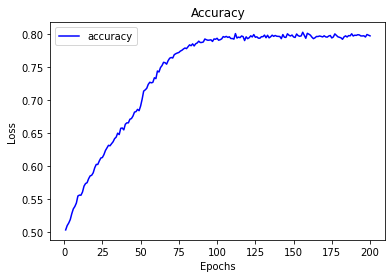

In [86]:
acc = history.history["accuracy"]
epochs = range(1, 201)
plt.plot(epochs, acc, "b", label="accuracy")
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

## Summary

In chapter 4 and 5, we learnt lots of useful deep learning techniques, such as impact of changing the network size and the key element of convolutional filters towards learning unique features of the images. 
And through mini FER project, i tried to cover most of the topics.

1. Network optimization. Depending on the application scale, we need to choose appropriate network: Is this classification or detection problem? How big the network should be? regularization? dropout? batch normalization? How about learning rate and activation layers? Is it enough epoch or if i train does the network gets better?

2. Overfit & underfit control. I used big enough network with more epochs to avoid underfitting. at the same time droupout to avoid overfitting. In the task, dropout increased the accuracy for about 1% overall, which is quite significant contribution.

3. I used data augmentation via keras data generator. This is also another factor to avoid overfitting on the training data.

4. I used dynamic learning rate, which decreases over time if the network no longer improves. This technique psuhes the network to the maximum. For example, we started with learning rate of 0.01. The following line means, by the time we reach to epoch 50, our learning rate was changed to ~0.005:

Epoch 00050: ReduceLROnPlateau reducing learning rate to 0.004999999888241291. 


5. Finetuning. Since I used data augmentation, after training, i used original images with different learning settings to further maximize the performance. It increased overall accuracy by 0.6%.

6. Using momentum. In this particular task, it is very easy to fall into local minima. So, using momentum helps to avoid local minima for some extend.

All these changes only improved the network accuracy from 64% to 67%. But this 3% margin is what differentiates the good model from average models.

P.S. In the FER challenge, I achieved 69.81% accuracy by using advanced network types (with attention guides) and by pre-processing the dataset. There are lots of problems with the original datasets, such as mislabeled data and non-face entries. Those should be deleted before training. Otherwise when we use datagen, we also generate bunch of non-face and mislabeled images in the process, which really confuses the model during training. And ultimately, model will get stuch in 6% accuracy without any improvement regardless of further training. However i think, for this assignment, using traditional VGG-like conv nets (only supervised learning) was sufficient. 